# 使用Scikit-Learn 完成預測
### Scikit-Learn在三個面向提供支援。
1. 獲取資料:***klearn.datasets***
2. 掌握資料:***sklearn.preprocessing*** 
3. 機器學習:***sklearn Estimator API*** 

獲取資料的方式有很多種（包含檔案、資料庫、網路爬蟲、Kaggle Datasets等），<br>
其中最簡單的方式是從Sklearn import 內建的資料庫。由於其特性隨手可得且不用下載，所以我們通常叫他**玩具資料**：

# 基本架構

* 讀取資料&pre-processing
* 切分訓練集與測試集 
* 模型配適
* 預測 
* 評估(計算成績可能是誤差值或正確率或..)


In [1]:
%matplotlib inline

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 讀取Iris資料集與資料前處理

Iris Flowers 資料集

我們在這個項目中使用 Iris Data Set，這個資料集中的每個樣本有4個特徵，1個類別。該資料集1中的樣本類別數為3類，每類樣本數目為50個，總共150個樣本。

屬性資訊：

    花萼長度 sepal length(cm)
    花萼寬度 sepal width(cm)
    花瓣長度 petal length(cm)
    花瓣寬度 petal width(cm)
    類別：
        Iris Setosa
        Iris Versicolour
        Iris Virginica

樣本特徵資料是數值型的，而且單位都相同（釐米）。

![Iris Flowers](images/iris_data.PNG)


In [2]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

* 印出iris的key值與檔案位置
* 查看前10筆資料
* 查看資料型別
* 印出標註的樣本類別資料

In [12]:
print(iris.keys())
print(iris['filename'])
print(iris.data[0:10])

print(type(iris.data))
print(iris.target_names)
print(iris.target)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
iris.csv
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
<class 'numpy.ndarray'>
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [16]:
# we only take the first two features. 
x = iris.data[:, :2]
print(x)
print(x.shape)

y = iris.target
print(y.shape)

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

In [17]:
#以下是組成 pandas DataFrame (也可以不用這種做)
x = pd.DataFrame(iris.data, columns=iris['feature_names'])
x.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [19]:
print('target_name'+str(iris['target_names']))

target_name['setosa' 'versicolor' 'virginica']


In [18]:
#建立Target欄位與資料
y2  = pd.DataFrame(iris['target'], columns=['target'])
y2.head()

,target
0,0
1,0
2,0
3,0
4,0


In [29]:
#合併資料特徵欄位與目標欄位
iris_data = pd.concat([x, y2], axis=1)
iris_data = iris_data[['sepal length (cm)', 'petal length (cm)', 'target']]
iris_data.head(10)

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
5,5.4,1.7,0
6,4.6,1.4,0
7,5.0,1.5,0
8,4.4,1.4,0
9,4.9,1.5,0


In [33]:
#只選擇目標為0與1的資料
iris_data = iris_data[iris_data['target'].isin([0, 1])]
iris_data
#print(iris['data'].size)

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
95,5.7,4.2,1
96,5.7,4.2,1
97,6.2,4.3,1
98,5.1,3.0,1


## 切分訓練集與測試集
> train_test_split()

In [120]:
from sklearn.model_selection import train_test_split

x= iris_data[['sepal length (cm)','petal length (cm)']]
y=iris_data[['target']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [121]:
print(x_train.head())
x_train.shape

    sepal length (cm)  petal length (cm)
58                6.6                4.6
94                5.6                4.2
95                5.7                4.2
27                5.2                1.5
67                5.8                4.1


(80, 2)

In [122]:
print(x_test.head())
x_test.shape

    sepal length (cm)  petal length (cm)
32                5.2                1.5
86                6.7                4.7
4                 5.0                1.4
13                4.3                1.1
71                6.1                4.0


(20, 2)

In [123]:
print(y_train.head())
y_train.shape

    target
58       1
94       1
95       1
27       0
67       1


(80, 1)

In [124]:
print(y_test.head())
y_test.shape

    target
32       0
86       1
4        0
13       0
71       1


(20, 1)

# Appendix 

>normalization和standardization是差不多的<br>
都是把數據進行前處理，從而使數值都落入到統一的數值範圍，從而在建模過程中，各個特徵量沒差別對待。<br> 
* normalization一般是把數據限定在需要的範圍，比如一般都是【0，1】，從而消除了數據量綱對建模的影響。<br> 
* standardization 一般是指將數據正態化，使平均值0方差為1.<br> 

因此normalization和standardization 是針對數據而言的，消除一些數值差異帶來的特種重要性偏見。<br>
經過歸一化的數據，能加快訓練速度，促進算法的收斂。

### Standardization (z-score)
    to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set. 

In [267]:
def norm_stats(dfs):
    print(dfs.head())
    minimum = np.min(dfs, axis=0)
    maximum = np.max(dfs, axis =0)
    mu = np.mean(dfs, axis=0)
    sigma = np.std(dfs, axis=0)
    return(minimum, maximum, mu, sigma)

def z_score(col, stats):
    min, max, mean, std = stats
  
    df = pd.DataFrame()
    for c in col.columns:
        df[c] = (col[c]-mean[c])/std[c]
    return df

In [269]:
stats = norm_stats(x_train)
arr_x_train = np.array(z_score(x_train, stats))
arr_x_train[:5]


    sepal length (cm)  petal length (cm)
58                6.6                4.6
94                5.6                4.2
95                5.7                4.2
27                5.2                1.5
67                5.8                4.1


array([[ 1.83406761,  1.18872568],
       [ 0.21099893,  0.91466788],
       [ 0.3733058 ,  0.91466788],
       [-0.43822854, -0.93522222],
       [ 0.53561267,  0.84615344]])

## use sklearn

In [227]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(x_train)  #Compute the statistics to be used for later scaling.
print(sc.mean_)  #mean
print(sc.scale_) #standard deviation

[5.47  2.865]
[0.61611687 1.45954616]


In [270]:
#transform: (x-u)/std.
X_train_std = sc.transform(x_train)
X_train_std[:5]

array([[ 1.83406761,  1.18872568],
       [ 0.21099893,  0.91466788],
       [ 0.3733058 ,  0.91466788],
       [-0.43822854, -0.93522222],
       [ 0.53561267,  0.84615344]])

The scaler instance can then be used on new data to transform it the same way it did on the training set:

In [181]:
X_test_std = sc.transform(x_test)
print(X_test_std[:10])

[[-0.43822854 -0.93522222]
 [ 1.99637448  1.25724013]
 [-0.76284228 -1.00373667]
 [-1.89899036 -1.20928001]
 [ 1.02253327  0.77763899]
 [ 0.3733058   0.43506675]
 [ 0.21099893  0.50358119]
 [ 2.48329508  1.25724013]
 [-1.08745602 -1.00373667]
 [ 1.02253327  1.18872568]]


you can also use fit_transform method (i.e., fit and then transform)    

In [182]:
X_train_std = sc.fit_transform(x_train)  
X_test_std = sc.fit_transform(x_test)
print(X_test_std[:10])


[[-0.38140223 -0.98107906]
 [ 1.69897357  1.35308674]
 [-0.65878567 -1.05402174]
 [-1.62962771 -1.27284979]
 [ 0.86682325  0.84248797]
 [ 0.31205637  0.47777456]
 [ 0.17336465  0.55071724]
 [ 2.11504873  1.35308674]
 [-0.93616911 -1.05402174]
 [ 0.86682325  1.28014406]]


In [271]:
print('mean of X_train_std:',np.round(X_train_std.mean(),4))
print('std of X_train_std:',X_train_std.std())

mean of X_train_std: -0.0
std of X_train_std: 1.0


## Min-Max Normaliaztion
    Transforms features by scaling each feature to a given range.
    The transformation is given by:

    X' = X - X.min(axis=0) / ((X.max(axis=0) - X.min(axis=0))
    X -> N 維資料
    


51.05084934658171
30.19979215083168


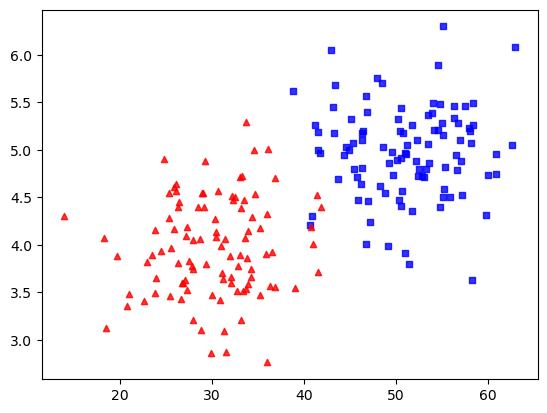

In [272]:
x1 = np.random.normal(50, 6, 100)  # np.random.normal(mu,sigma,size))
y1 = np.random.normal(5, 0.5, 100)

x2 = np.random.normal(30,6,100)
y2 = np.random.normal(4,0.5,100)
plt.scatter(x1,y1,c='b',marker='s',s=20,alpha=0.8)
plt.scatter(x2,y2,c='r', marker='^', s=20, alpha=0.8)

print(np.sum(x1)/len(x1))
print(np.sum(x2)/len(x2))

In [273]:
x_val = np.concatenate((x1,x2))
y_val = np.concatenate((y1,y2))

x_val.shape

(200,)

In [274]:
def minmax_norm(X):
    return (X - X.min(axis=0)) / ((X.max(axis=0) - X.min(axis=0)))

In [275]:
minmax_norm(x_val[:10])

array([0.95386467, 0.11917482, 0.49165014, 0.4538057 , 1.        ,
       0.58053355, 0.04113003, 0.1362348 , 0.        , 0.9082069 ])

In [278]:
from sklearn.preprocessing import MinMaxScaler
x_val=x_val.reshape(-1, 1)#1D -> 2D
scaler = MinMaxScaler().fit(x_val)  # default range 0~1
print(scaler.data_max_)
print(scaler.transform(x_val)[:10])

[62.92379574]
[[0.88077211]
 [0.5904107 ]
 [0.71998273]
 [0.70681788]
 [0.89682109]
 [0.75090237]
 [0.56326146]
 [0.59634531]
 [0.54895366]
 [0.86488926]]
